In [25]:
import pandas as pd
import numpy as np

# Загрузите данные из файла
df = pd.read_csv('data2.csv', sep=',')

# Преобразуйте столбец "Приоритет" в числовой формат (например, 1 для "Высокий", 2 для "Низкий" и 3 для "Нормальный")
priority_mapping = {"Высокий": 1, "Низкий": 2, "Нормальный": 3}
df['Приоритет'] = df['Приоритет'].map(priority_mapping)

# Рассчитайте корреляцию между "Приоритет" и "Количество дней на выполнение"
correlation = df['Приоритет'].corr(df['Количество дней'])

# Выведите коэффициент корреляции
print(f"Корреляция между Приоритетом и Количеством дней на выполнение: {correlation:.2f}")


Корреляция между Приоритетом и Количеством дней на выполнение: -0.01


In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Загрузите ваш DataFrame с данными
df = pd.read_csv('data2.csv', sep=';')

# Переименование столбцов
df = df.rename(columns={'Количество дней': 'Days', 'Статус': 'Status'})

# Проведем однофакторный дисперсионный анализ
formula = 'Days ~ C(Status)'
model = ols(formula, data=df).fit()
anova_table = anova_lm(model, typ=2)

# Выведем результат ANOVA
print(anova_table)

                  sum_sq       df         F    PR(>F)
C(Status)     748.796922      9.0  1.112548  0.349547
Residual   845047.885748  11300.0       NaN       NaN


In [9]:
import pandas as pd

# Загрузите файл data.csv в DataFrame с разделителем ";"
df = pd.read_csv('data.csv', sep=';')

# Извлеките заголовки столбцов
column_headers = df.columns.tolist()

# Отобразите первые строки для оценки данных
df.head()

# Преобразование столбца "час(а,ов)" в числовой формат
df['час(а,ов)'] = df['час(а,ов)'].str.replace(',', '.').astype(float)

# Группировка данных по статусу и сумма времени выполнения
status_time = df.groupby('Статус')['час(а,ов)'].sum().reset_index()

# Округление времени выполнения в днях и часах
status_time['Дней'] = status_time['час(а,ов)'] // 24
status_time['Часов'] = status_time['час(а,ов)'] % 24

# Отобразите результат анализа
result_table = status_time[['Статус', 'Дней', 'Часов']]
result_table

,Статус,Дней,Часов
0,В очереди,18.0,12.00
1,В работе,112.0,11.00
2,Закрыта,417.0,12.50
3,Запрос информации,2.0,14.00
4,На тестировании,439.0,4.50
5,На тестировании у клиента,8.0,13.00
6,Новая,5.0,14.00
7,Отклонена,6.0,5.50
8,Приостановлено,83.0,6.00
9,Решена,1195.0,9.04


In [18]:
import pandas as pd

# Загрузите файл data4_updated.csv в DataFrame
df = pd.read_csv('data2.csv', sep=';')

# Преобразуйте столбцы "Плановая дата завершения", "Дата начала" и "Дата завершения" в формат даты
df['Плановый срок завершения'] = pd.to_datetime(df['Плановый срок завершения'], format='%Y-%m-%d')
df['Дата начала'] = pd.to_datetime(df['Дата начала'], format='%Y-%m-%d')
df['Дата завершения'] = pd.to_datetime(df['Дата завершения'], format='%Y-%m-%d')

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
df['Завершено в срок'] = df['Дата завершения'] <= df['Плановый срок завершения']

# Группируйте данные по пользователю и подсчитайте количество задач, завершенных в срок
user_completion_counts = df.groupby('Пользователь')['Завершено в срок'].sum().reset_index()

# Отсортируйте пользователей по убыванию количества задач, завершенных в срок
user_completion_counts = user_completion_counts.sort_values(by='Завершено в срок', ascending=False)

# Выведите результат
print("Пользователи, чаще завершающие задачи в срок:")
print(user_completion_counts)


Пользователи, чаще завершающие задачи в срок:
        Пользователь  Завершено в срок
7   Буторина Татьяна               236
46  Руднев Александр               235
45   Розсохань Елена               205
25   Курбатова Софья               168
23  Костенко Алексей               163
..               ...               ...
28    Марченко Алена                 0
19      Илясов Макар                 0
33     Найденов Юрий                 0
53       Танцов Илья                 0
41  Портянкин Виктор                 0

[68 rows x 2 columns]


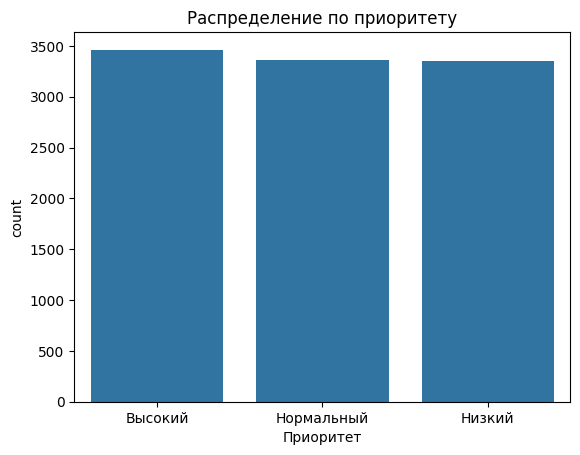

                            Завершено в срок
Пользователь    Приоритет                   
Артемова Ксения Высокий             0.313131
                Низкий              0.373626
                Нормальный          0.301075
Бердникова Анна Высокий             0.358025
                Низкий              0.282609
...                                      ...
Ярыгина Ирина   Низкий              0.357143
                Нормальный          0.342466
Яценко Кристина Высокий             0.500000
                Низкий              0.000000
                Нормальный          1.000000

[177 rows x 1 columns]


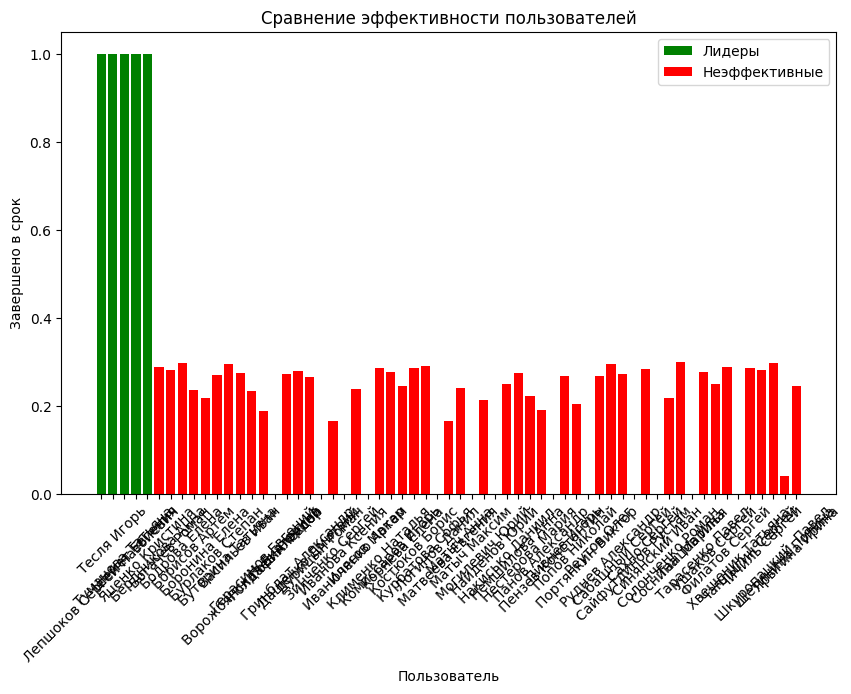

                  Завершено в срок  Приоритет
Завершено в срок          1.000000  -0.001711
Приоритет                -0.001711   1.000000


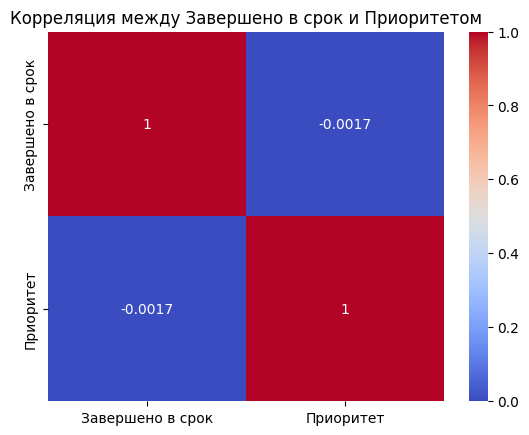

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузите файл с данными в DataFrame
df = pd.read_csv('data2.csv', sep=';')

# Проведите анализ данных
# 1. Постройте гистограмму или столбчатую диаграмму для приоритета
sns.countplot(x='Приоритет', data=df)
plt.title('Распределение по приоритету')
plt.show()

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
df['Завершено в срок'] = df['Дата завершения'] <= df['Плановый срок завершения']

# Группируйте данные по пользователю и подсчитайте количество задач, завершенных в срок
user_completion_counts = df.groupby('Пользователь')['Завершено в срок'].sum().reset_index()

# Отсортируйте пользователей по убыванию количества задач, завершенных в срок
user_completion_counts = user_completion_counts.sort_values(by='Завершено в срок', ascending=False)

# 2. Постройте сводную таблицу, показывающую связь между Пользователем, Завершено в срок и Приоритетом
pivot_table = pd.pivot_table(df, values='Завершено в срок', index=['Пользователь', 'Приоритет'], aggfunc='mean')
print(pivot_table)

# Фильтрация пользователей
selected_users = pivot_table[(pivot_table > 0.7) | (pivot_table < 0.3)].reset_index()

# Разделение на лидеров и неэффективных
leaders = selected_users[selected_users['Завершено в срок'] > 0.7]
inefficient = selected_users[selected_users['Завершено в срок'] < 0.3]

# Постройка столбчатой диаграммы
plt.figure(figsize=(10, 6))
plt.bar(leaders['Пользователь'], leaders['Завершено в срок'], label='Лидеры', color='g')
plt.bar(inefficient['Пользователь'], inefficient['Завершено в срок'], label='Неэффективные', color='r')
plt.xlabel("Пользователь")
plt.ylabel("Завершено в срок")
plt.title("Сравнение эффективности пользователей")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Преобразуйте столбец "Приоритет" в числовой формат (например, 1 для "Высокий", 2 для "Низкий" и 3 для "Нормальный")
priority_mapping = {"Высокий": 1, "Низкий": 2, "Нормальный": 3}
df['Приоритет'] = df['Приоритет'].map(priority_mapping)

# 3. Постройте корреляционную матрицу, чтобы оценить корреляцию между переменными
correlation_matrix = df[['Завершено в срок', 'Приоритет']].corr()
print(correlation_matrix)

# 4. Постройте тепловую карту для корреляционной матрицы
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляция между Завершено в срок и Приоритетом')
plt.show()


In [36]:
import pandas as pd

# Загрузите данные из файлов
data_df = pd.read_csv('data2.csv', sep=';')
manager_survey_df = pd.read_csv('manager_survey_data.csv')

# Объедините данные по столбцу 'EmployeeID'
merged_df = data_df.merge(manager_survey_df, on='EmployeeID', how='inner')

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
merged_df['Завершено в срок'] = merged_df['Дата завершения'] <= merged_df['Плановый срок завершения']

# Группируйте данные по пользователю и подсчитайте количество задач, завершенных в срок
user_completion_counts = merged_df.groupby('Пользователь')['Завершено в срок'].sum().reset_index()

# Преобразуйте столбец "Приоритет" в числовой формат (например, 1 для "Высокий", 2 для "Низкий" и 3 для "Нормальный")
priority_mapping = {"Высокий": 1, "Низкий": 2, "Нормальный": 3}
merged_df['Приоритет'] = merged_df['Приоритет'].map(priority_mapping)
# Подсчет корреляции между столбцами
correlation = merged_df[['Завершено в срок', 'Приоритет', 'JobInvolvement']].corr()

# Вывод корреляции
print("Корреляция между Завершено в срок, Приоритет и JobInvolvement:")
print(correlation)

# Группировка и агрегация данных
grouped = merged_df.groupby(['Пользователь', 'Завершено в срок', 'Приоритет', 'JobInvolvement']).size().reset_index(name='Количество')

# Вывод сводной таблицы
print("Сводная таблица по Пользователь, Завершено в срок, Приоритет и JobInvolvement:")
print(grouped)



Корреляция между Завершено в срок, Приоритет и JobInvolvement:
                  Завершено в срок  Приоритет  JobInvolvement
Завершено в срок          1.000000  -0.001711       -0.007022
Приоритет                -0.001711   1.000000       -0.004988
JobInvolvement           -0.007022  -0.004988        1.000000
Сводная таблица по Пользователь, Завершено в срок, Приоритет и JobInvolvement:
        Пользователь  Завершено в срок  Приоритет  JobInvolvement  Количество
0    Артемова Ксения             False        1.0               3          68
1    Артемова Ксения             False        2.0               3          57
2    Артемова Ксения             False        3.0               3          65
3    Артемова Ксения              True        1.0               3          31
4    Артемова Ксения              True        2.0               3          34
..               ...               ...        ...             ...         ...
321    Ярыгина Ирина              True        3.0               

In [51]:
import pandas as pd
from scipy.stats import f_oneway

# Загрузите данные из файла
df = pd.read_csv('ourPerson.csv', sep=';')

# Замените числовые значения уровней вовлеченности на их текстовое представление
level_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df['JobInvolvement'] = df['JobInvolvement'].map(level_mapping)

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
df['Завершено в срок'] = df['Дата завершения'] <= df['Плановый срок завершения']
# Разделите данные на группы в соответствии с уровнем вовлеченности
groups = [df[df['JobInvolvement'] == level]['Завершено в срок'] for level in level_mapping.values()]

# Проведите ANOVA анализ
f_statistic, p_value = f_oneway(*groups)

# Выведите результаты
print("Результаты ANOVA анализа:")
print("F-статистика:", f_statistic)
print("p-значение:", p_value)

# Оцените статистическую значимость различий
alpha = 0.05
if p_value < alpha:
    print("Существуют статистически значимые различия между уровнями вовлеченности.")
else:
    print("Нет статистически значимых различий между уровнями вовлеченности.")

# 2.Сводная таблица, показывающая связь между Пользователем, Завершено в срок и Приоритетом
pivot_table = pd.pivot_table(df, values='Завершено в срок', index=['Пользователь', 'Приоритет', 'JobInvolvement'], aggfunc='mean')
print(pivot_table)


Результаты ANOVA анализа:
F-статистика: 0.20085897274447911
p-значение: 0.8958397678977228
Нет статистически значимых различий между уровнями вовлеченности.
                                           Завершено в срок
Пользователь    Приоритет  JobInvolvement                  
Артемова Ксения Высокий    High                    0.333333
                           Low                     0.294118
                           Medium                  0.240000
                           Very High               0.421053
                Низкий     High                    0.370370
...                                                     ...
Яценко Кристина Высокий    Low                     0.000000
                           Medium                  1.000000
                Низкий     Medium                  0.000000
                Нормальный Low                     1.000000
                           Very High               1.000000

[611 rows x 1 columns]


                                           Завершено в срок
Пользователь    Приоритет  JobInvolvement                  
Артемова Ксения Высокий    High                    0.333333
                           Low                     0.294118
                           Medium                  0.240000
                           Very High               0.421053
                Низкий     High                    0.370370
...                                                     ...
Яценко Кристина Высокий    Low                     0.000000
                           Medium                  1.000000
                Низкий     Medium                  0.000000
                Нормальный Low                     1.000000
                           Very High               1.000000

[611 rows x 1 columns]


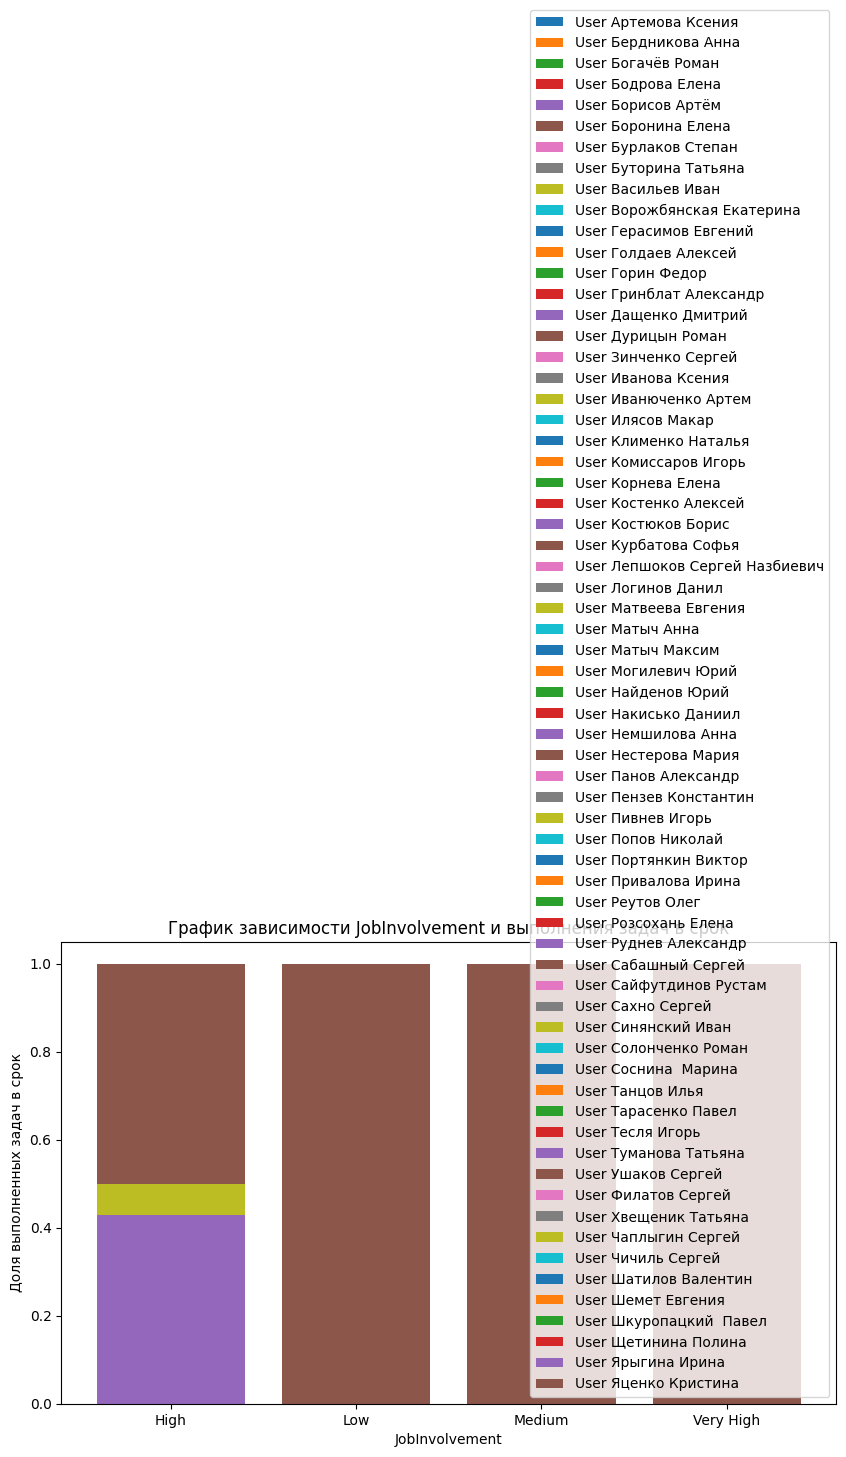

Пользователи в категории "Низкая": ['Артемова Ксения', 'Артемова Ксения', 'Артемова Ксения', 'Артемова Ксения', 'Артемова Ксения', 'Бердникова Анна', 'Бердникова Анна', 'Бердникова Анна', 'Бердникова Анна', 'Бердникова Анна', 'Бердникова Анна', 'Богачёв Роман', 'Богачёв Роман', 'Богачёв Роман', 'Богачёв Роман', 'Богачёв Роман', 'Богачёв Роман', 'Бодрова Елена', 'Бодрова Елена', 'Бодрова Елена', 'Бодрова Елена', 'Бодрова Елена', 'Борисов Артём', 'Борисов Артём', 'Борисов Артём', 'Борисов Артём', 'Борисов Артём', 'Боронина Елена', 'Боронина Елена', 'Боронина Елена', 'Боронина Елена', 'Боронина Елена', 'Боронина Елена', 'Боронина Елена', 'Бурлаков Степан', 'Бурлаков Степан', 'Бурлаков Степан', 'Бурлаков Степан', 'Бурлаков Степан', 'Бурлаков Степан', 'Бурлаков Степан', 'Буторина Татьяна', 'Буторина Татьяна', 'Буторина Татьяна', 'Буторина Татьяна', 'Буторина Татьяна', 'Васильев Иван', 'Васильев Иван', 'Васильев Иван', 'Васильев Иван', 'Васильев Иван', 'Васильев Иван', 'Ворожбянская Екатерин

C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_4308\201553876.py:56: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_users = pivot_table.groupby('Доля_категория')['Пользователь'].nunique()


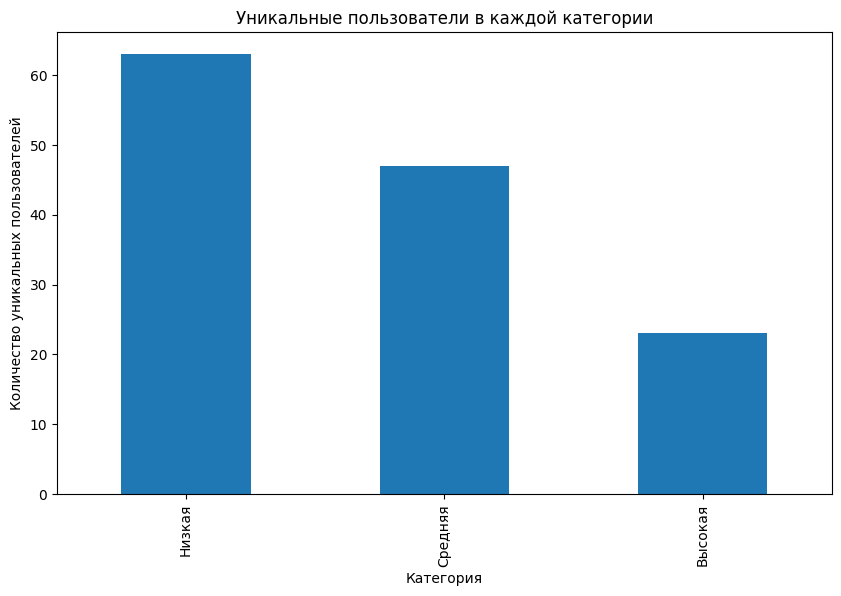

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Загрузите данные из файла
df = pd.read_csv('ourPerson.csv', sep=';')

# Замените числовые значения уровней вовлеченности на их текстовое представление
level_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df['JobInvolvement'] = df['JobInvolvement'].map(level_mapping)

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
df['Завершено в срок'] = df['Дата завершения'] <= df['Плановый срок завершения']
# Разделите данные на группы в соответствии с уровнем вовлеченности
groups = [df[df['JobInvolvement'] == level]['Завершено в срок'] for level in level_mapping.values()]

# 2.Сводная таблица, показывающая связь между Пользователем, Завершено в срок и Приоритетом
pivot_table = pd.pivot_table(df, values='Завершено в срок', index=['Пользователь', 'Приоритет', 'JobInvolvement'], aggfunc='mean')
print(pivot_table)

pivot_table.reset_index(inplace=True)

user_grouped = pivot_table.groupby('Пользователь')

# Создайте фигуру и оси для графика
fig, ax = plt.subplots(figsize=(10, 6))

# Переберите группы пользователей и постройте столбчатую диаграмму для каждой группы
for user, group_data in user_grouped:
    ax.bar(group_data['JobInvolvement'], group_data['Завершено в срок'], label=f'User {user}')

# Настройка меток и легенды
ax.set_xlabel('JobInvolvement')
ax.set_ylabel('Доля выполненных задач в срок')
ax.set_title('График зависимости JobInvolvement и выполнения задач в срок')
ax.legend()

# Показать график
plt.show()

# с разбивкой по категориям доли выполнения

bins = [0, 0.3, 0.7, 1.0]  # Границы категорий
labels = ["Низкая", "Средняя", "Высокая"]  # Названия категорий

pivot_table['Доля_категория'] = pd.cut(pivot_table['Завершено в срок'], bins=bins, labels=labels, include_lowest=True)

# Группировка по категориям
category_grouped = pivot_table.groupby('Доля_категория', observed=True)

# Вывод пользователей по категориям
for category, group_data in category_grouped:
    if not group_data['Пользователь'].empty:
        users = group_data['Пользователь'].tolist()
        print(f'Пользователи в категории "{category}": {users}')
unique_users = pivot_table.groupby('Доля_категория')['Пользователь'].nunique()

# Постройте график
unique_users.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Категория')
plt.ylabel('Количество уникальных пользователей')
plt.title('Уникальные пользователи в каждой категории')
plt.show()


                                           Завершено в срок
Пользователь    Приоритет  JobInvolvement                  
Артемова Ксения Высокий    High                    0.333333
                           Low                     0.294118
                           Medium                  0.240000
                           Very High               0.421053
                Низкий     High                    0.370370
...                                                     ...
Яценко Кристина Высокий    Low                     0.000000
                           Medium                  1.000000
                Низкий     Medium                  0.000000
                Нормальный Low                     1.000000
                           Very High               1.000000

[611 rows x 1 columns]


C:\Users\SKurbatova\AppData\Local\Temp\ipykernel_4308\293632472.py:40: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_users = pivot_table.groupby('Доля_категория')['Пользователь'].nunique()


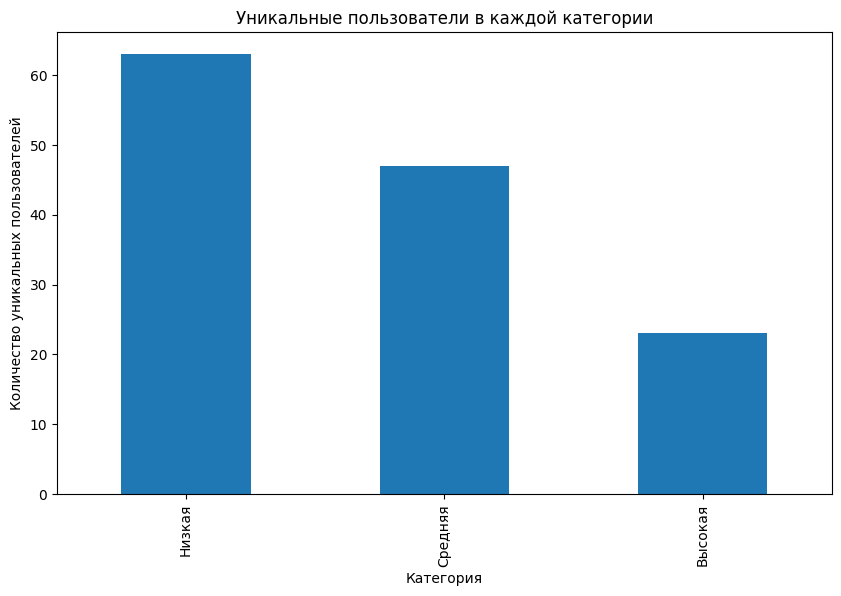

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Загрузите данные из файла
df = pd.read_csv('ourPerson.csv', sep=';')

# Замените числовые значения уровней вовлеченности на их текстовое представление
level_mapping = {1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
df['JobInvolvement'] = df['JobInvolvement'].map(level_mapping)

# Создайте новый столбец "Завершено в срок", который указывает, была ли задача завершена в срок
df['Завершено в срок'] = df['Дата завершения'] <= df['Плановый срок завершения']
# Разделите данные на группы в соответствии с уровнем вовлеченности
groups = [df[df['JobInvolvement'] == level]['Завершено в срок'] for level in level_mapping.values()]

# 2.Сводная таблица, показывающая связь между Пользователем, Завершено в срок и Приоритетом
pivot_table = pd.pivot_table(df, values='Завершено в срок', index=['Пользователь', 'Приоритет', 'JobInvolvement'], aggfunc='mean')
print(pivot_table)

pivot_table.reset_index(inplace=True)

user_grouped = pivot_table.groupby('Пользователь')

# с разбивкой по категориям доли выполнения

bins = [0, 0.3, 0.7, 1.0]  # Границы категорий
labels = ["Низкая", "Средняя", "Высокая"]  # Названия категорий

pivot_table['Доля_категория'] = pd.cut(pivot_table['Завершено в срок'], bins=bins, labels=labels, include_lowest=True)

# Группировка по категориям
category_grouped = pivot_table.groupby('Доля_категория', observed=True)

# Вывод пользователей по категориям
for category, group_data in category_grouped:
    if not group_data['Пользователь'].empty:
        users = group_data['Пользователь'].tolist()
        #print(f'Пользователи в категории "{category}": {users}')
unique_users = pivot_table.groupby('Доля_категория')['Пользователь'].nunique()

# Постройте график
unique_users.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Категория')
plt.ylabel('Количество уникальных пользователей')
plt.title('Уникальные пользователи в каждой категории')
plt.show()
